# REGRESSÃO LINEAR COM GRADIENTE DESCENDENTE

# PASSO A PASSO

# #1 - DESIGN DO MODELO(INPUT, OUTPUT, FORWARD PASS)

# #2 - DEFINIÇÃO DA FUNÇÃO DE CUSTO E OTIMIZADOR

# #3 - LOOP DE TREINAMENTO:

     - FORWARD PASS: CALCULAR A PREDIÇÃO E O CUSTO

     - BACKWARPASS: CALCULAR OS GRADIENTES

     - ARUALIZAR OS PESOS

In [141]:
import torch
import time 
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw
from torch.autograd import Variable

# Carregando os dados

In [142]:
dados = pd.read_csv('ex1data1.txt')

# Preparação dos dados

In [143]:
dados.rename(columns={'profit': 'Lucro',
                      'population':'população'},
             inplace=True)

In [144]:
x = np.array(dados['Lucro'])
y = np.array(dados['população'])

In [145]:
lucro = torch.from_numpy(x.astype(np.float32))
populacao = torch.from_numpy(y.astype(np.float32))
populacao = populacao.view(populacao.shape[0],1)
lucro = lucro.view(lucro.shape[0],1)

In [146]:
print(lucro.shape)
print(populacao.shape)

torch.Size([97, 1])
torch.Size([97, 1])


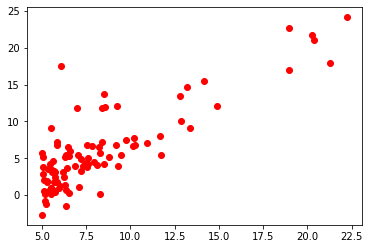

In [147]:
plt.plot(x, y, 'ro')

# Definição do Modelo

In [148]:
tamanho_de_entrada = 1
tamanho_de_saida = 1
modelo = nn.Linear(tamanho_de_entrada, tamanho_de_saida)

# Definição da função de custo e otimizador

In [149]:
taxa_de_aprendizagem = 0.03
criterion = torch.nn.MSELoss()
otimizador = torch.optim.SGD(modelo.parameters(), lr = taxa_de_aprendizagem)
print(modelo.parameters())



<generator object Module.parameters at 0x7f6baecd09e0>


# Loop de Treinamento

Época: 9
Custo: 2251558486016.0
Coeficientes
m: -647638.19
m (gradiente): 27076310.00
b: -65062.07
b (gradiente): 2720110.75


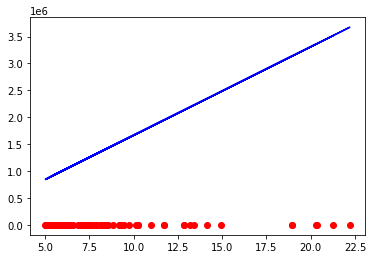

Época: 19
Custo: 1.7696644695901052e+24
Coeficientes
m: -574165221376.00
m (gradiente): 24004538662912.00
b: -57681113088.00
b (gradiente): 2411516133376.00


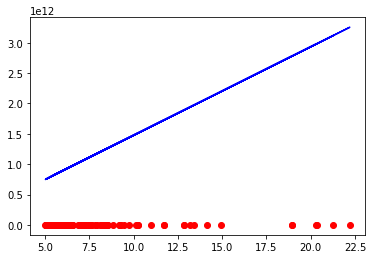

Época: 29
Custo: 1.3909099725161212e+36
Coeficientes
m: -509026948257677312.00
m (gradiente): 21281258661837012992.00
b: -51137289375449088.00
b (gradiente): 2137933839756951552.00


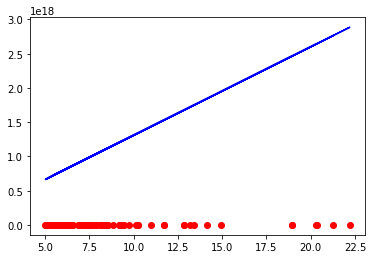

Época: 39
Custo: inf
Coeficientes
m: -451278697061033181184000.00
m (gradiente): 18866934386514049244332032.00
b: -45335841433295660253184.00
b (gradiente): 1895388253824472691245056.00


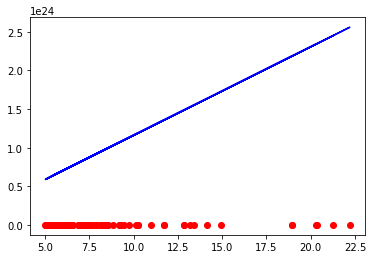

Época: 49
Custo: inf
Coeficientes
m: -400082137416856556820232142848.00
m (gradiente): 16726522345944165140004318740480.00
b: -40192585318383148944385376256.00
b (gradiente): 1680360496736006841447005290496.00


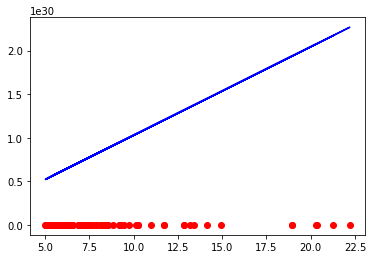

Época: 59
Custo: inf
Coeficientes
m: -354693272791365671002526779185299456.00
m (gradiente): 14828917141891616811926563751437795328.00
b: -35632784386747792997598248321417216.00
b (gradiente): 1489725555192462054484655027288801280.00


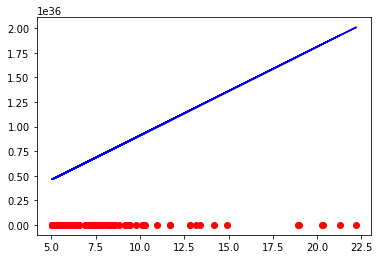

Época: 69
Custo: nan
Coeficientes
m: nan
m (gradiente): nan
b: nan
b (gradiente): nan


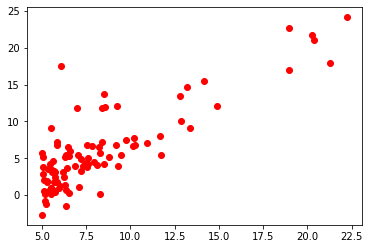

Época: 79
Custo: nan
Coeficientes
m: nan
m (gradiente): nan
b: nan
b (gradiente): nan


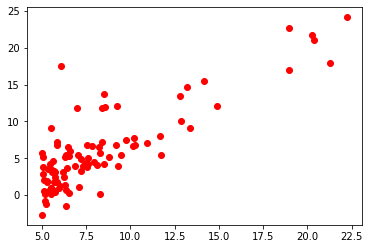

Época: 89
Custo: nan
Coeficientes
m: nan
m (gradiente): nan
b: nan
b (gradiente): nan


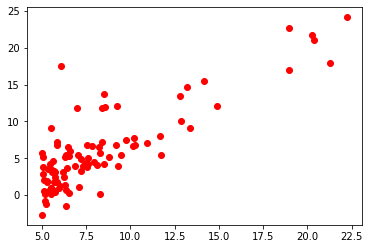

Época: 99
Custo: nan
Coeficientes
m: nan
m (gradiente): nan
b: nan
b (gradiente): nan


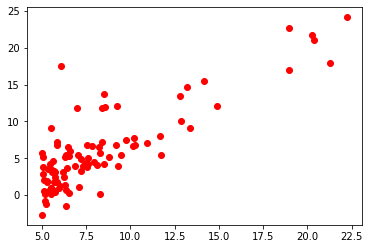

GRÁFICO DA FUNÇÃO DE CUSTO


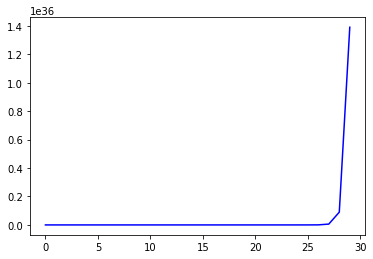

In [150]:
num_epocas = 100
contador_custo = []
for epoca in range(num_epocas):
    #froward pass and loss
    y_hat = modelo(lucro)
    loss = criterion(y_hat, populacao)
    contador_custo.append(loss)
    
    #backward pass(calcular gradientes)
    loss.backward()
    
    #update(atualizar os pesos)
    otimizador.step()

    if (epoca + 1)%10 == 0:
        print(f'Época: {epoca}')
        print(f'Custo: {loss.item()}')
        print('Coeficientes')
        print(f'm: {modelo.weight.data.detach().item():.2f}')
        print(f'm (gradiente): {modelo.weight.grad.detach().item():.2f}')
        print(f'b: {modelo.bias.data.detach().item():.2f}')
        print(f'b (gradiente): {modelo.bias.grad.detach().item():.2f}')
        
        previsao_final = y_hat.detach().numpy()
        plt.plot(lucro, populacao, 'ro')
        plt.plot(lucro, previsao_final, 'b')
        plt.show()
        
    #limpar o otimizador
    otimizador.zero_grad()

custo = [contador.detach().numpy() for contador in contador_custo]

#plotando o gráfico da função de Custo
print("GRÁFICO DA FUNÇÃO DE CUSTO")
plt.plot(custo, 'b')
plt.show()
    